<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week10%20-%20Classification/walkthrough/WalkthroughClassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

Classification is part of **supervised learning**. <br>
### Here is a quick reminder: <br>

#### Types of Machine Learning: 
- Supervised Learning:
  - **Classification**
  - Regression
- Unsupervised Learning:
  - Dimensionality Reduction 
  - Clustering
- others

The idea is to classify items of a dataset into **predefined classes**. 

#### Examples of classification: <br>
- Image classification (Is this a cat or not?)
- Risky or safe loan application (Should a bank provide a loan to applicant or not?)
- Prediction of customer behaviour (will a customer buy this new product or not?)
- etc.








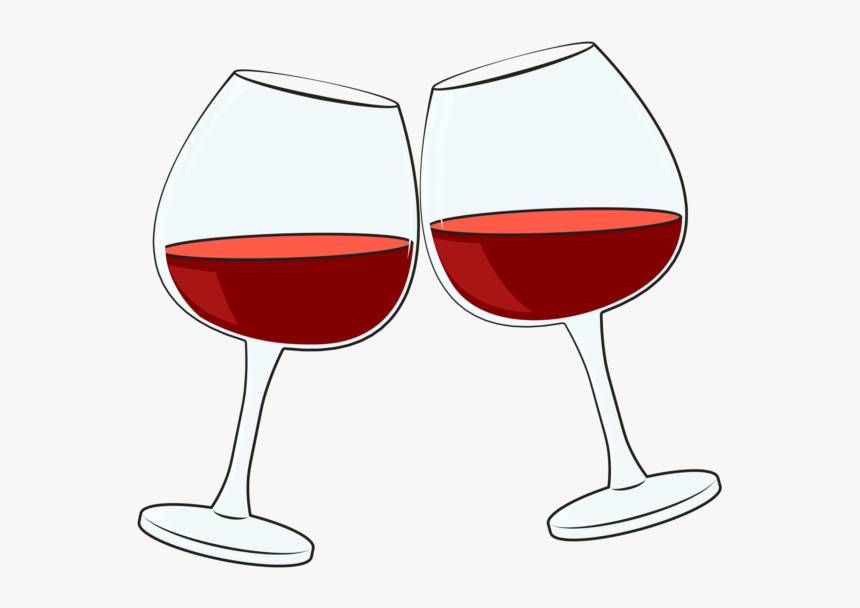


For the Walkthough we will use a dataset on wine quality. As usual, you can find it in the /data folder.

In [6]:
#Load dataset
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/winequality-red.csv'
wines = pd.read_csv(url)
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
#Define features and target variable
X = wines.drop(columns='quality')
y = wines['quality']

Let's see the different classes

In [8]:
wines['quality'].value_counts()

0    681
1    638
Name: quality, dtype: int64

In this exercise, we are going to classify the the wine based on his content characteristics to find the quality category to which it corresponds to.  

#### 1) Split into train and test set
 
The data is split into random train and test subsets. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We use the test dataset in order to test our prediction on this subset.


In [9]:
#Split data set into a train and a test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.3)

#### 2) Normalization

When we have a dataset with features that have very distinct ranges (for example one feature where age is between 0 and 99 year and another feature being the income ranging from 1'000CHF to 200'000CHF) we might get biaised results. We want the features to be in the same or similar ranges. Therefore, we **normalize** the data. It involves scaling all values for a specific feature given attribute so that they fall within a small specified range.
We can use *StandardScaler()*, *MinMaxScaler* () or others for normalization.
<br>

In our example we will normalize our **train AND test data** using StandardScaler.

/!\ **IMPORTANT**: When you normalize the train data, you need to do the same modification (here normalization) to the test data. 

In [10]:
#Define normalization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train, y_train)

array([[ 0.27487539,  0.00908641,  0.02741107, ..., -0.26789006,
        -0.28757412, -1.01037863],
       [-2.11410754,  0.3634565 , -0.45501207, ...,  3.53614878,
        -0.28757412,  2.80891465],
       [-0.56126863,  0.71782659, -1.36625576, ...,  1.96206374,
         1.94606607, -0.37382975],
       ...,
       [-0.08347205,  0.77688827,  1.58188561, ..., -0.92375882,
        -0.16348299, -0.90428715],
       [-0.8598915 ,  0.48157986, -0.9374352 , ...,  0.71591309,
         1.07742822, -0.79819567],
       [ 0.33459997,  0.06814809, -1.15184548, ..., -0.66141132,
        -0.28757412,  0.68708505]])

In [11]:
#Apply normalization
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#### 3) Building the Classifier or Model <br>

First we will need to create our model which can be for example a *Linear Regression* (simple linear classifier, simple quadratic classifier) or a *Logistic Regression*. We will build the model from the **training set**. So, we will need to split our dataset into **test** and **trainig sets**. Then we use the train set to create the model. 

In [12]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [13]:
#Fit model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 4) Using Classifier for Classification

Once our model has been built we can use the **test set** to predict the model. Basically, the test data is used to estimate the accuracy of classification rules. If the accuracy is considered acceptable we can use our model for new data. <br>
*/!\ When using new data in our model we will need potentially to normalize this data.*

#### 5) Evaluation of our Classification

We want to check the accuracy of our model using train and test data. 

In [14]:
#Use model on test and check accuracy
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.72
Accuracy of Logistic regression classifier on test set: 0.70


####Baserate for evaluation

You should have found an accuracy of approximately 70%? Is it good or bad? 

Lets investigate class distribution : 


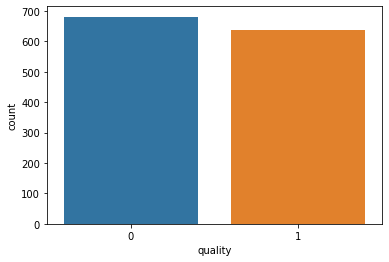

In [15]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(y)
plot = plt.show()


It all depends on the baserate. Baserate = $\frac{\text{most frequent class}}{\text{total observations}}$

If the base rate is too high then the classification can be biaised, meaning that the data set has too many variables of one class compared to the other classes and has hence more impact on the classification results. 

Let's calculate the base rate!

In [16]:
#Compute the base rate
#Base rate = (most frequent class)/(total observations)

quality_0 = wines.loc[wines["quality"] == 0].shape[0]
print("# = class 0 ", quality_0)
quality_1 = wines.loc[wines["quality"] == 1].shape[0]
print("# = class 1 ", quality_1)
print("Baserate = ", max(quality_0, quality_1)/(wines["quality"].shape[0]))

# = class 0  681
# = class 1  638
Baserate =  0.5163002274450341


####Confusion matrix
The confusion matrix allows us to get more details on the performance of our model. It will allow us to see what our classification model is getting right and what types of errors it is making.

You will get this: 

|   | Class 1 predicted  | Class 2 predicted  |    
|---|---|---|
| **Class 1 actual**  |  TP |FN   |    
| **Class 2 actual**  | FP  | TN  |   

<br>

where TP = true positive, FN = false negative, FP = false positive and TN = true negative 
          

In [17]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))


array([[148,  63],
       [ 55, 130]])

One score wich is always interesting to compute in order to have a robust idea of the model performance is to compute the precision. It accounts for the ratio of true positives over all positive entries in the data set 

In [18]:
from sklearn.metrics import precision_score
precision_score(y_test, model.predict(X_test), average='macro')

0.7013195844712728

#### 6) Visualization of our Model 

Now, for visualization purposes, lets build a 2d model to predict quality from  alcohol and sulphite content and  plot decision boundaries. In fact, depending on how many classes we have we will see different zones on the graph. Each zone corresponds to a class. Decision boundaries indicate the lines above / below which a data point belongs to one or another class.

However we can only visualize 2 dimensional data. Thus for visualization purposes we are only going to consider the mass and the width feature.







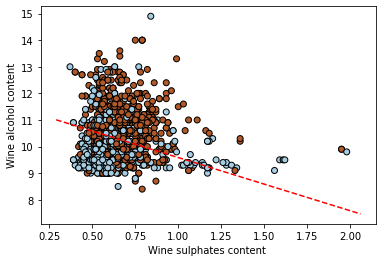

In [19]:
#Decision boundaries
import numpy as np
import matplotlib.pyplot as plt


X = X [['sulphates', 'alcohol']]
model = LogisticRegression()
model.fit(X, y)


plt.scatter(X['sulphates'].values, X['alcohol'].values, c=y, edgecolors='k', cmap=plt.cm.Paired)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-x_vals * model.coef_[0][0] - model.intercept_[0])/model.coef_[0][1]
plt.plot(x_vals, y_vals, '--', c="red")

plt.xlabel('Wine sulphates content ')
plt.ylabel('Wine alcohol content')


plt.xticks()
plt.yticks()

plt.show()

Let's interpret this graph. The red doted line shows the boundary between the two regions. Everything on one side of this line will be in one class while everything on the other side will be on the other class. 
Furthermore, the closer a point is to the decision region boundary the more uncertain we are about the accuracy of the classification. This doted line is found using the coefficient of our model.

Let's see how our model would classify new data points

In [20]:
model.predict([[0.56,10.8], [0.56,8.8]])

array([1, 0])

As expected a wine with sulphite at 0.56 and an alcohol percentage of 9.8 is in one class while for the same sulphite content but for an alcohol percentage of 10.8 the wine belongs to the other class.

We can also compute the probability of making the correct prediction. Obviously any point on the boundary has equal probability for both classes

In [21]:
model.predict_proba([[0.56,10.8], [0.56,8.8]])

array([[0.42414687, 0.57585313],
       [0.82104667, 0.17895333]])

We see that the second data point is correclty classified with almost certainty. It makes sense since it is located far from the boundary. However, for the first one, it is way more uncertain

#### Adding Cross Validation
We will use logisitic regression with CROSS VALIDATION. So, instead of LogisticRegresion() we will use LogisticRegresionCV(CV= K)

To prevent overfitting we can use cross-validation. We will as before split the data set into train and test data, 
fit the model using training data and evaluate the model using testing data. **The difference** is that we will now repeat the process K times then take average of the testing errors as a final performance measure.



In [22]:
#Create model
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)

In [23]:
#Fit the model using the training data
model_cv.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [24]:
#Use model on test and check accuracy
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model_cv.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model_cv.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.72
Accuracy of Logistic regression classifier on test set: 0.70


In [25]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_train, model_cv.predict(X_train))
print(cf)

[[352 118]
 [142 311]]


Let's make the confusion matrix a little bit nicer.

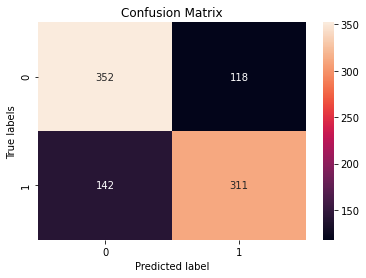

In [26]:
ax = plt.subplot()
r = sns.heatmap(cf, annot = True, fmt = 'g', ax = ax)

ax.set_xlabel('Predicted label')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
w =ax.yaxis.set_ticklabels(['0', '1'])


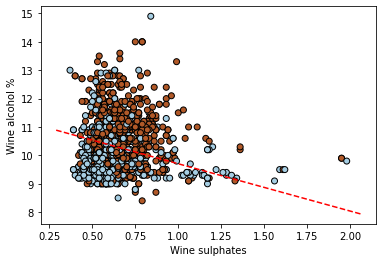

In [27]:
#Decision boundaries
import numpy as np
import matplotlib.pyplot as plt


X = X [['sulphates', 'alcohol']]
model = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
model.fit(X, y)


plt.scatter(X['sulphates'].values, X['alcohol'].values, c=y, edgecolors='k', cmap=plt.cm.Paired)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-x_vals * model.coef_[0][0] - model.intercept_[0])/model.coef_[0][1]
plt.plot(x_vals, y_vals, '--', c="red")

plt.xlabel('Wine sulphates')
plt.ylabel('Wine alcohol %')


plt.xticks()
plt.yticks()

plt.show()